# SVM & Naive Bayes

1.  Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

In [1]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
classifier = svm.SVC()

# Train the classifier using the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


2. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then
compare their accuracies.

In [2]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM classifiers with Linear and RBF kernels
svm_linear = svm.SVC(kernel='linear')
svm_rbf = svm.SVC(kernel='rbf')

# Train the classifiers using the training data
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the accuracy of the classifiers
accuracy_linear = metrics.accuracy_score(y_test, y_pred_linear)
accuracy_rbf = metrics.accuracy_score(y_test, y_pred_rbf)

# Print the accuracies
print("Accuracy (Linear Kernel):", accuracy_linear)
print("Accuracy (RBF Kernel):", accuracy_rbf)

# Compare the accuracies
if accuracy_linear > accuracy_rbf:
    print("Linear kernel performs better with an accuracy of", accuracy_linear)
elif accuracy_rbf > accuracy_linear:
    print("RBF kernel performs better with an accuracy of", accuracy_rbf)
else:
    print("Both kernels perform equally well with an accuracy of", accuracy_linear)

Accuracy (Linear Kernel): 1.0
Accuracy (RBF Kernel): 0.8055555555555556
Linear kernel performs better with an accuracy of 1.0


3. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean
Squared Error (MSE).

In [4]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
housing = datasets.fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVR model
svr = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train the SVR model using the training data
svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(X_test)

# Evaluate the SVR model using Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Evaluate the SVR model using Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

# Evaluate the SVR model using Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.32449462225743636
Root Mean Squared Error (RMSE): 0.5696442945009073
Mean Absolute Error (MAE): 0.37376508304715095


4.  Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
boundary.

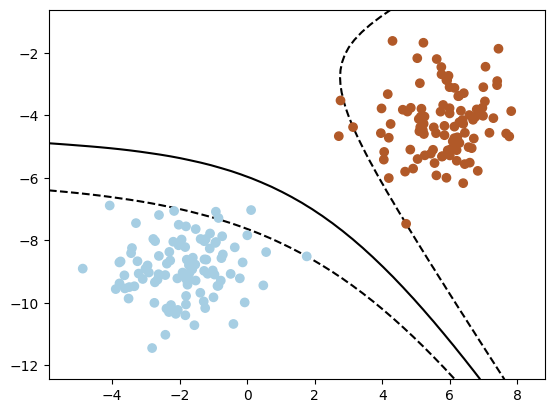

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Generate a dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=1.05, random_state=40)

# Create an SVM classifier with a polynomial kernel
clf = svm.SVC(kernel='poly', degree=3, C=1)

# Train the classifier using the dataset
clf.fit(X, y)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')

plt.show()

5. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and
evaluate accuracy.

In [6]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Load the Breast Cancer dataset
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naïve Bayes classifier
gnb = GaussianNB()

# Train the classifier using the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[40  3]
 [ 0 71]]


6. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
Newsgroups dataset.

In [7]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the training data and transform both the training and testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create a Multinomial Naïve Bayes classifier
mnb = MultinomialNB()

# Train the classifier using the training data
mnb.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = mnb.predict(X_test_tfidf)

# Evaluate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.8785145888594165
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       151
           1       0.88      0.84      0.86       202
           2       0.87      0.85      0.86       195
           3       0.65      0.85      0.74       183
           4       0.94      0.87      0.90       205
           5       0.95      0.85      0.90       215
           6       0.93      0.72      0.81       193
           7       0.91      0.94      0.92       196
           8       0.89      0.95      0.92       168
           9       0.95      0.95      0.95       211
          10       0.90      0.99      0.94       198
          11       0.91      0.97      0.94       201
          12       0.92      0.82      0.86       202
          13       0.97      0.94      0.96       194
          14       0.88      0.99      0.93       189
          15       0.72      0.99      0.83       202
          16       0.81      

7. Write a Python program to train an SVM Classifier with different C values and compare the decision
boundaries visually.

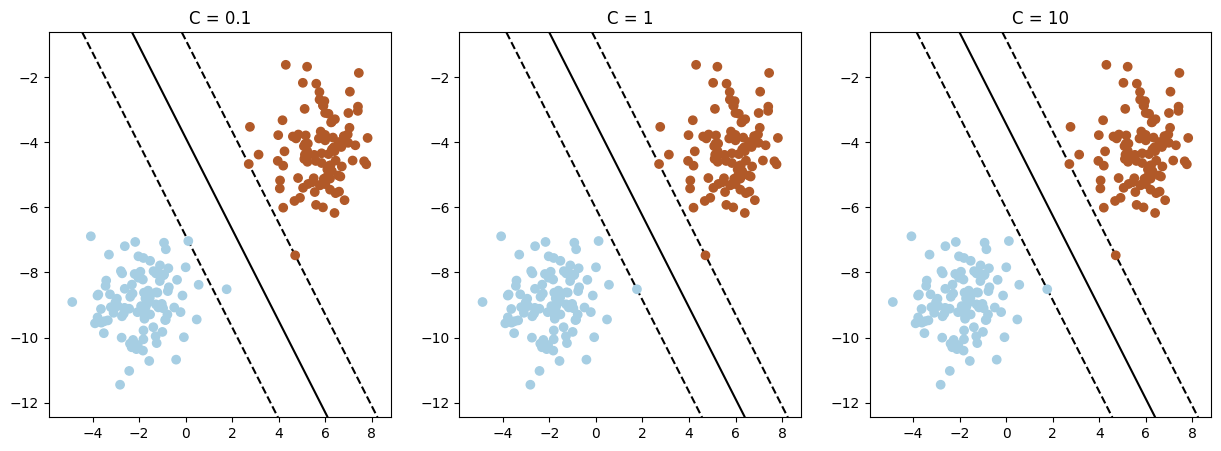

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Generate a dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=1.05, random_state=40)

# Define C values
C_values = [0.1, 1, 10]

# Create a figure with multiple subplots
fig, axs = plt.subplots(1, len(C_values), figsize=(15, 5))

# Train SVM classifiers with different C values and plot decision boundaries
for i, C in enumerate(C_values):
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)

    # Plot the dataset
    axs[i].scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[i].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    # Highlight support vectors
    axs[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')

    axs[i].set_title(f"C = {C}")

plt.show()

8. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
binary features.

In [9]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import numpy as np

# Generate a dataset with binary features
np.random.seed(0)
X = np.random.randint(2, size=(200, 10))  # 200 samples, 10 binary features
y = np.random.randint(2, size=200)  # Binary target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bernoulli Naïve Bayes classifier
bnb = BernoulliNB()

# Train the classifier using the training data
bnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bnb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.43      0.41        21
           1       0.29      0.26      0.28        19

    accuracy                           0.35        40
   macro avg       0.34      0.35      0.34        40
weighted avg       0.35      0.35      0.35        40

Confusion Matrix:
[[ 9 12]
 [14  5]]


9. Write a Python program to apply feature scaling before training an SVM model and compare results with
unscaled data.

In [10]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model on unscaled data
svm_unscaled = svm.SVC(kernel='linear', C=1)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = metrics.accuracy_score(y_test, y_pred_unscaled)
print("Accuracy (Unscaled Data):", accuracy_unscaled)

# Apply feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM model on scaled data
svm_scaled = svm.SVC(kernel='linear', C=1)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = metrics.accuracy_score(y_test, y_pred_scaled)
print("Accuracy (Scaled Data):", accuracy_scaled)

# Compare the results
if accuracy_scaled > accuracy_unscaled:
    print("Feature scaling improves the accuracy of the SVM model.")
elif accuracy_unscaled > accuracy_scaled:
    print("No improvement in accuracy after feature scaling.")
else:
    print("Feature scaling does not affect the accuracy of the SVM model.")

Accuracy (Unscaled Data): 1.0
Accuracy (Scaled Data): 0.9666666666666667
No improvement in accuracy after feature scaling.


10. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
after Laplace Smoothing.

In [11]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gaussian Naïve Bayes model without var_smoothing
gnb_without_smoothing = GaussianNB(var_smoothing=0)
gnb_without_smoothing.fit(X_train, y_train)
y_pred_without_smoothing = gnb_without_smoothing.predict(X_test)
accuracy_without_smoothing = metrics.accuracy_score(y_test, y_pred_without_smoothing)
print("Accuracy (Without Smoothing):", accuracy_without_smoothing)

# Train a Gaussian Naïve Bayes model with var_smoothing
gnb_with_smoothing = GaussianNB(var_smoothing=1e-9) # A small value for var_smoothing
gnb_with_smoothing.fit(X_train, y_train)
y_pred_with_smoothing = gnb_with_smoothing.predict(X_test)
accuracy_with_smoothing = metrics.accuracy_score(y_test, y_pred_with_smoothing)
print("Accuracy (With Smoothing):", accuracy_with_smoothing)

# Compare the results
if accuracy_with_smoothing > accuracy_without_smoothing:
    print("Smoothing improves the accuracy of the Gaussian Naïve Bayes model.")
elif accuracy_without_smoothing > accuracy_with_smoothing:
    print("No improvement in accuracy after smoothing.")
else:
    print("Smoothing does not affect the accuracy of the Gaussian Naïve Bayes model.")


Accuracy (Without Smoothing): 1.0
Accuracy (With Smoothing): 1.0
Smoothing does not affect the accuracy of the Gaussian Naïve Bayes model.


11. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
gamma, kernel).

In [12]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn import metrics

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# Create an SVM classifier
svm_classifier = svm.SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the SVM classifier with the best hyperparameters
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svm.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


12. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
check it improve accuracy.

In [15]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.datasets import make_classification
import numpy as np

# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=3, n_repeated=2, n_classes=2, weights=[0.1, 0.9], random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier without class weighting
svm_unweighted = svm.SVC(kernel='linear', C=1)
svm_unweighted.fit(X_train, y_train)
y_pred_unweighted = svm_unweighted.predict(X_test)
accuracy_unweighted = metrics.accuracy_score(y_test, y_pred_unweighted)
print("Accuracy (Without Class Weighting):", accuracy_unweighted)
print("F1 Score (Without Class Weighting):", metrics.f1_score(y_test, y_pred_unweighted))

# Train an SVM classifier with class weighting
svm_weighted = svm.SVC(kernel='linear', C=1, class_weight='balanced')
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
accuracy_weighted = metrics.accuracy_score(y_test, y_pred_weighted)
print("Accuracy (With Class Weighting):", accuracy_weighted)
print("F1 Score (With Class Weighting):", metrics.f1_score(y_test, y_pred_weighted))

# Compare the results
if accuracy_weighted > accuracy_unweighted:
    print("Class weighting improves the accuracy of the SVM classifier.")
elif accuracy_unweighted > accuracy_weighted:
    print("No improvement in accuracy after class weighting.")
else:
    print("Class weighting does not affect the accuracy of the SVM classifier.")

Accuracy (Without Class Weighting): 0.935
F1 Score (Without Class Weighting): 0.9653333333333334
Accuracy (With Class Weighting): 0.82
F1 Score (With Class Weighting): 0.8922155688622755
No improvement in accuracy after class weighting.


13. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

In [20]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample email data
emails = [
    'Get rich quick with this amazing offer!',
    'Hi, how are you doing?',
    'Free money now!',
    'Meeting scheduled for tomorrow',
    'Urgent: Your account has been compromised',
    'Hello, just wanted to check in',
    'Claim your prize today!'
]

# Corresponding labels (1 for spam, 0 for not spam)
labels = [1, 0, 1, 0, 1, 0, 1]

# Split data into training and testing sets (optional for this small example, but good practice)
# For this small dataset, we'll use all data for training.
X_train, y_train = emails, labels

# Create a CountVectorizer to convert text data into a matrix of token counts
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform it
X_train_counts = vectorizer.fit_transform(X_train)

# Create a Multinomial Naïve Bayes classifier
mnb_spam = MultinomialNB()

# Train the classifier
mnb_spam.fit(X_train_counts, y_train)

# Now, let's test with some new emails
new_emails = [
    'Win a free iPhone now!',
    'Can we reschedule the meeting?',
    'Your bank account is blocked.',
    'Just saying hi'
]

# Transform the new emails using the same vectorizer
X_new_counts = vectorizer.transform(new_emails)

# Predict the labels for the new emails
predicted_labels = mnb_spam.predict(X_new_counts)

# Map predictions back to 'spam' or 'not spam'
label_map = {1: 'spam', 0: 'not spam'}
predicted_spam = [label_map[label] for label in predicted_labels]

# Print the predictions
for email, prediction in zip(new_emails, predicted_spam):
    print(f"Email: '{email}' -> Prediction: {prediction}")

# For a more realistic scenario, you would use a larger, labeled dataset
# and split it into training and testing sets to evaluate performance
# using metrics like accuracy, precision, recall, and F1-score.


Email: 'Win a free iPhone now!' -> Prediction: spam
Email: 'Can we reschedule the meeting?' -> Prediction: not spam
Email: 'Your bank account is blocked.' -> Prediction: spam
Email: 'Just saying hi' -> Prediction: not spam


14. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
compare their accuracy.

In [21]:
# Load a dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train an SVM Classifier
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)
print("SVM Classifier Accuracy:", accuracy_svm)
print("SVM Classification Report:")
print(metrics.classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred_svm))

print("-" * 30)

# 2. Train a Gaussian Naïve Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = metrics.accuracy_score(y_test, y_pred_nb)
print("Naïve Bayes Classifier Accuracy:", accuracy_nb)
print("Naïve Bayes Classification Report:")
print(metrics.classification_report(y_test, y_pred_nb))
print("Naïve Bayes Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred_nb))

print("-" * 30)

# Compare accuracies
print("Comparison of Accuracies:")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Naïve Bayes Accuracy: {accuracy_nb:.4f}")

if accuracy_svm > accuracy_nb:
  print("SVM Classifier performed better.")
elif accuracy_nb > accuracy_svm:
  print("Naïve Bayes Classifier performed better.")
else:
  print("Both classifiers performed equally well.")

SVM Classifier Accuracy: 1.0
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

SVM Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
------------------------------
Naïve Bayes Classifier Accuracy: 1.0
Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Naïve Bayes Confusio

15. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
results.

In [22]:
from sklearn.feature_selection import SelectKBest, chi2

# Load a dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train Naïve Bayes without Feature Selection ---
print("Training Naïve Bayes without Feature Selection:")
nb_no_fs = GaussianNB()
nb_no_fs.fit(X_train, y_train)
y_pred_no_fs = nb_no_fs.predict(X_test)
accuracy_no_fs = metrics.accuracy_score(y_test, y_pred_no_fs)
print("Accuracy (No Feature Selection):", accuracy_no_fs)
print("-" * 30)

# --- Train Naïve Bayes with Feature Selection ---

# Apply feature selection using SelectKBest with chi-squared test
# Select the top k features (e.g., k=2 for Iris dataset)
k_features = 2
selector = SelectKBest(chi2, k=k_features)

# Fit the selector on the training data and transform both training and testing data
# chi2 requires non-negative data, Iris data is non-negative.
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print(f"Training Naïve Bayes with Feature Selection (k={k_features}):")
nb_with_fs = GaussianNB()
nb_with_fs.fit(X_train_selected, y_train)
y_pred_with_fs = nb_with_fs.predict(X_test_selected)
accuracy_with_fs = metrics.accuracy_score(y_test, y_pred_with_fs)
print("Accuracy (With Feature Selection):", accuracy_with_fs)
print("-" * 30)


# --- Compare Results ---
print("Comparison of Accuracies:")
print(f"Accuracy (No Feature Selection): {accuracy_no_fs:.4f}")
print(f"Accuracy (With Feature Selection): {accuracy_with_fs:.4f}")

if accuracy_with_fs > accuracy_no_fs:
    print("Feature selection improved the accuracy of the Naïve Bayes model.")
elif accuracy_no_fs > accuracy_with_fs:
    print("Feature selection did not improve the accuracy (or slightly decreased).")
else:
    print("Feature selection did not affect the accuracy.")

# You can experiment with different feature selection methods and values of k.
# For different datasets, you might need different feature selection methods (e.g., mutual_info_classif for non-negative data).


Training Naïve Bayes without Feature Selection:
Accuracy (No Feature Selection): 1.0
------------------------------
Training Naïve Bayes with Feature Selection (k=2):
Accuracy (With Feature Selection): 1.0
------------------------------
Comparison of Accuracies:
Accuracy (No Feature Selection): 1.0000
Accuracy (With Feature Selection): 1.0000
Feature selection did not affect the accuracy.


16. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
strategies on the Wine dataset and compare their accuracy.

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM base estimator
base_estimator = svm.SVC(kernel='linear', probability=True) # Using probability=True for potential future use, though not strictly needed for accuracy

# Train an SVM Classifier with One-vs-Rest (OvR) strategy
print("Training SVM with One-vs-Rest strategy:")
ovr_classifier = OneVsRestClassifier(base_estimator)
ovr_classifier.fit(X_train, y_train)
y_pred_ovr = ovr_classifier.predict(X_test)
accuracy_ovr = metrics.accuracy_score(y_test, y_pred_ovr)
print("Accuracy (One-vs-Rest):", accuracy_ovr)
print("-" * 30)

# Train an SVM Classifier with One-vs-One (OvO) strategy
print("Training SVM with One-vs-One strategy:")
ovo_classifier = OneVsOneClassifier(base_estimator)
ovo_classifier.fit(X_train, y_train)
y_pred_ovo = ovo_classifier.predict(X_test)
accuracy_ovo = metrics.accuracy_score(y_test, y_pred_ovo)
print("Accuracy (One-vs-One):", accuracy_ovo)
print("-" * 30)

# Compare the accuracies
print("Comparison of Accuracies:")
print(f"Accuracy (One-vs-Rest): {accuracy_ovr:.4f}")
print(f"Accuracy (One-vs-One): {accuracy_ovo:.4f}")

if accuracy_ovr > accuracy_ovo:
  print("One-vs-Rest strategy performed better.")
elif accuracy_ovo > accuracy_ovr:
  print("One-vs-One strategy performed better.")
else:
  print("Both strategies performed equally well.")

Training SVM with One-vs-Rest strategy:
Accuracy (One-vs-Rest): 1.0
------------------------------
Training SVM with One-vs-One strategy:
Accuracy (One-vs-One): 1.0
------------------------------
Comparison of Accuracies:
Accuracy (One-vs-Rest): 1.0000
Accuracy (One-vs-One): 1.0000
Both strategies performed equally well.


17. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
Cancer dataset and compare their accuracy.

In [24]:
# Load the Breast Cancer dataset
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM classifiers with different kernels
svm_linear = svm.SVC(kernel='linear', C=1)
svm_poly = svm.SVC(kernel='poly', degree=3, C=1) # You might tune degree and C
svm_rbf = svm.SVC(kernel='rbf', C=1, gamma='scale') # You might tune gamma and C

# Train the classifiers using the scaled training data
print("Training SVM with Linear kernel...")
svm_linear.fit(X_train_scaled, y_train)
print("Training SVM with Polynomial kernel...")
svm_poly.fit(X_train_scaled, y_train)
print("Training SVM with RBF kernel...")
svm_rbf.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_poly = svm_poly.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluate the accuracy of the classifiers
accuracy_linear = metrics.accuracy_score(y_test, y_pred_linear)
accuracy_poly = metrics.accuracy_score(y_test, y_pred_poly)
accuracy_rbf = metrics.accuracy_score(y_test, y_pred_rbf)

# Print the accuracies
print("\nAccuracy (Linear Kernel):", accuracy_linear)
print("Accuracy (Polynomial Kernel):", accuracy_poly)
print("Accuracy (RBF Kernel):", accuracy_rbf)

# Compare the accuracies
print("\nComparison of Accuracies:")
print(f"Linear Kernel Accuracy: {accuracy_linear:.4f}")
print(f"Polynomial Kernel Accuracy: {accuracy_poly:.4f}")
print(f"RBF Kernel Accuracy: {accuracy_rbf:.4f}")

best_accuracy = max(accuracy_linear, accuracy_poly, accuracy_rbf)

if best_accuracy == accuracy_linear:
    print("Linear kernel performed the best.")
elif best_accuracy == accuracy_poly:
    print("Polynomial kernel performed the best.")
else:
    print("RBF kernel performed the best.")

# Optional: Print classification reports and confusion matrices
print("\nClassification Report (Linear Kernel):")
print(metrics.classification_report(y_test, y_pred_linear))

print("\nClassification Report (Polynomial Kernel):")
print(metrics.classification_report(y_test, y_pred_poly))

print("\nClassification Report (RBF Kernel):")
print(metrics.classification_report(y_test, y_pred_rbf))

print("\nConfusion Matrix (Linear Kernel):")
print(metrics.confusion_matrix(y_test, y_pred_linear))

print("\nConfusion Matrix (Polynomial Kernel):")
print(metrics.confusion_matrix(y_test, y_pred_poly))

print("\nConfusion Matrix (RBF Kernel):")
print(metrics.confusion_matrix(y_test, y_pred_rbf))

Training SVM with Linear kernel...
Training SVM with Polynomial kernel...
Training SVM with RBF kernel...

Accuracy (Linear Kernel): 0.956140350877193
Accuracy (Polynomial Kernel): 0.868421052631579
Accuracy (RBF Kernel): 0.9824561403508771

Comparison of Accuracies:
Linear Kernel Accuracy: 0.9561
Polynomial Kernel Accuracy: 0.8684
RBF Kernel Accuracy: 0.9825
RBF kernel performed the best.

Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Classification Report (Polynomial Kernel):
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        43
           1       0.83      1.00      0.90        71

    accuracy                    

18. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
average accuracy.

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create an SVM classifier
svm_classifier = svm.SVC(kernel='linear', C=1, random_state=42)

# Define the number of splits for Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# List to store accuracies from each fold
accuracies = []

print(f"Performing Stratified K-Fold Cross-Validation with {n_splits} splits...")

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"  Fold {fold + 1}/{n_splits}")

    # Split data into training and testing sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Clone the classifier for each fold to ensure a fresh start
    classifier = clone(svm_classifier)

    # Train the classifier on the training data for the current fold
    classifier.fit(X_train, y_train)

    # Make predictions on the test data for the current fold
    y_pred = classifier.predict(X_test)

    # Evaluate the accuracy for the current fold
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"    Accuracy: {accuracy:.4f}")

# Compute the average accuracy across all folds
average_accuracy = np.mean(accuracies)
print("\nAverage Accuracy (Stratified K-Fold Cross-Validation):", average_accuracy)

Performing Stratified K-Fold Cross-Validation with 5 splits...
  Fold 1/5
    Accuracy: 1.0000
  Fold 2/5
    Accuracy: 1.0000
  Fold 3/5
    Accuracy: 0.9333
  Fold 4/5
    Accuracy: 1.0000
  Fold 5/5
    Accuracy: 1.0000

Average Accuracy (Stratified K-Fold Cross-Validation): 0.9866666666666667


19. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare
performance.

In [26]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the empirical prior probabilities from the training data
class_counts = np.bincount(y_train)
empirical_priors = class_counts / len(y_train)

print("Empirical Prior Probabilities:", empirical_priors)

# --- Train Naïve Bayes with empirical prior probabilities (default) ---
print("\nTraining Naïve Bayes with Empirical Prior Probabilities:")
nb_empirical_prior = GaussianNB()
nb_empirical_prior.fit(X_train, y_train)
y_pred_empirical = nb_empirical_prior.predict(X_test)
accuracy_empirical = metrics.accuracy_score(y_test, y_pred_empirical)
print("Accuracy (Empirical Priors):", accuracy_empirical)

# --- Train Naïve Bayes with different custom prior probabilities ---
# Example: Give more weight to class 0
custom_priors_biased = [0.5, 0.3, 0.2] # Must sum to 1

print("\nTraining Naïve Bayes with Custom Prior Probabilities (Biased towards Class 0):")
try:
  nb_custom_prior_biased = GaussianNB(priors=custom_priors_biased)
  nb_custom_prior_biased.fit(X_train, y_train)
  y_pred_biased = nb_custom_prior_biased.predict(X_test)
  accuracy_biased = metrics.accuracy_score(y_test, y_pred_biased)
  print("Accuracy (Custom Priors - Biased):", accuracy_biased)
except ValueError as e:
  print(f"Error training with custom priors: {e}")
  print("Make sure the number of priors matches the number of classes and they sum to 1.")


# Example: Uniform prior probabilities (if applicable, e.g., for balancing)
# For Iris (3 classes), uniform priors would be [1/3, 1/3, 1/3]
uniform_priors = [1/3, 1/3, 1/3]

print("\nTraining Naïve Bayes with Uniform Prior Probabilities:")
try:
  nb_uniform_prior = GaussianNB(priors=uniform_priors)
  nb_uniform_prior.fit(X_train, y_train)
  y_pred_uniform = nb_uniform_prior.predict(X_test)
  accuracy_uniform = metrics.accuracy_score(y_test, y_pred_uniform)
  print("Accuracy (Uniform Priors):", accuracy_uniform)
except ValueError as e:
  print(f"Error training with uniform priors: {e}")
  print("Make sure the number of priors matches the number of classes and they sum to 1.")


# --- Compare Performance ---
print("\nComparison of Accuracies with Different Priors:")
print(f"Accuracy (Empirical Priors): {accuracy_empirical:.4f}")
if 'accuracy_biased' in locals():
    print(f"Accuracy (Custom Priors - Biased): {accuracy_biased:.4f}")
if 'accuracy_uniform' in locals():
    print(f"Accuracy (Uniform Priors): {accuracy_uniform:.4f}")

# You can further compare performance using other metrics like precision, recall, F1-score,
# especially if evaluating the impact on specific classes.

Empirical Prior Probabilities: [0.33333333 0.34166667 0.325     ]

Training Naïve Bayes with Empirical Prior Probabilities:
Accuracy (Empirical Priors): 1.0

Training Naïve Bayes with Custom Prior Probabilities (Biased towards Class 0):
Accuracy (Custom Priors - Biased): 1.0

Training Naïve Bayes with Uniform Prior Probabilities:
Accuracy (Uniform Priors): 1.0

Comparison of Accuracies with Different Priors:
Accuracy (Empirical Priors): 1.0000
Accuracy (Custom Priors - Biased): 1.0000
Accuracy (Uniform Priors): 1.0000


20. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
compare accuracy.

In [27]:
from sklearn.feature_selection import RFE

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train SVM without RFE ---
print("Training SVM without RFE:")
svm_no_rfe = svm.SVC(kernel='linear', C=1, random_state=42)
svm_no_rfe.fit(X_train, y_train)
y_pred_no_rfe = svm_no_rfe.predict(X_test)
accuracy_no_rfe = metrics.accuracy_score(y_test, y_pred_no_rfe)
print("Accuracy (No RFE):", accuracy_no_rfe)
print("-" * 30)

# --- Train SVM with RFE ---

# Create a base estimator for RFE (e.g., linear SVM)
estimator = svm.SVC(kernel='linear', C=1)

# Create RFE object and select the desired number of features
# Let's select the top 2 features (adjust as needed for your dataset)
n_features_to_select = 2
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select, step=1)

# Fit RFE on the training data to select features
rfe.fit(X_train, y_train)

# Transform the training and testing data to include only the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

print(f"Training SVM with RFE (selected {n_features_to_select} features):")

# Train an SVM classifier on the RFE-selected features
svm_with_rfe = svm.SVC(kernel='linear', C=1, random_state=42) # Use the same kernel and C for comparison
svm_with_rfe.fit(X_train_rfe, y_train)

# Make predictions on the RFE-transformed test data
y_pred_with_rfe = svm_with_rfe.predict(X_test_rfe)

# Evaluate the accuracy
accuracy_with_rfe = metrics.accuracy_score(y_test, y_pred_with_rfe)
print("Accuracy (With RFE):", accuracy_with_rfe)
print("-" * 30)

# --- Compare Results ---
print("Comparison of Accuracies:")
print(f"Accuracy (No RFE): {accuracy_no_rfe:.4f}")
print(f"Accuracy (With RFE): {accuracy_with_rfe:.4f}")

if accuracy_with_rfe > accuracy_no_rfe:
    print(f"RFE improved the accuracy of the SVM model by selecting {n_features_to_select} features.")
elif accuracy_no_rfe > accuracy_with_rfe:
    print("RFE did not improve the accuracy (or slightly decreased).")
else:
    print("RFE did not affect the accuracy.")

# Optional: Print the ranking of features by RFE
print("\nFeature Ranking from RFE:")
print("Features ranked from 1 (most important) to n (least important).")
print(f"Selected Features Mask: {rfe.support_}")
print(f"Feature Ranking: {rfe.ranking_}")
print("Original feature names/indices:")
iris.feature_names

Training SVM without RFE:
Accuracy (No RFE): 1.0
------------------------------
Training SVM with RFE (selected 2 features):
Accuracy (With RFE): 1.0
------------------------------
Comparison of Accuracies:
Accuracy (No RFE): 1.0000
Accuracy (With RFE): 1.0000
RFE did not affect the accuracy.

Feature Ranking from RFE:
Features ranked from 1 (most important) to n (least important).
Selected Features Mask: [False False  True  True]
Feature Ranking: [3 2 1 1]
Original feature names/indices:


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

21. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
F1-Score instead of accuracy.

In [28]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
classifier = svm.SVC(random_state=42)

# Train the classifier using the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the performance using Precision, Recall, and F1-Score
precision = metrics.precision_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class
recall = metrics.recall_score(y_test, y_pred, average='weighted')     # Use 'weighted' for multi-class
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')      # Use 'weighted' for multi-class

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# You can also print the full classification report which includes these metrics per class
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred))

# Confusion Matrix is also useful for understanding performance
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


22. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
(Cross-Entropy Loss).

In [29]:
# Load a dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naïve Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier using the training data
nb_classifier.fit(X_train, y_train)

# To compute Log Loss, we need predicted probabilities
# Naïve Bayes models in scikit-learn have a predict_proba method
y_pred_proba = nb_classifier.predict_proba(X_test)

# Evaluate the performance using Log Loss (Cross-Entropy Loss)
# Log loss requires the true labels and the predicted probabilities for each class
log_loss = metrics.log_loss(y_test, y_pred_proba)

print("Log Loss (Cross-Entropy Loss):", log_loss)

# Optional: Also evaluate accuracy for context
y_pred = nb_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix for a complete picture
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Log Loss (Cross-Entropy Loss): 0.02625269787231071
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


23. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

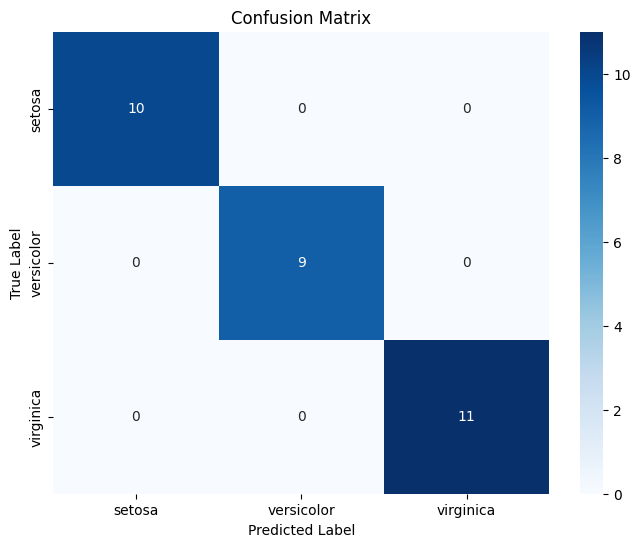

Accuracy: 1.0000


In [30]:
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
classifier = svm.SVC(random_state=42)

# Train the classifier using the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Compute the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optional: Print accuracy for context
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

24. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
Error (MAE) instead of MSE.

In [31]:
# The previous code snippet already loads the California Housing dataset, splits it, scales it, trains an SVR, and calculates MAE.
# I will just extract the relevant part for the MAE calculation.

# Load the California Housing dataset
housing = datasets.fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVR model
# You can experiment with different kernels (rbf, linear, poly) and hyperparameters (C, gamma, epsilon)
svr = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train the SVR model using the training data
svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(X_test)

# Evaluate the SVR model using Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# You can also optionally print other metrics for comparison
# mse = metrics.mean_squared_error(y_test, y_pred)
# print("Mean Squared Error (MSE):", mse)
# rmse = mse ** 0.5
# print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.37376508304715095


25. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
score.

ROC-AUC Score: 0.9983622666229938


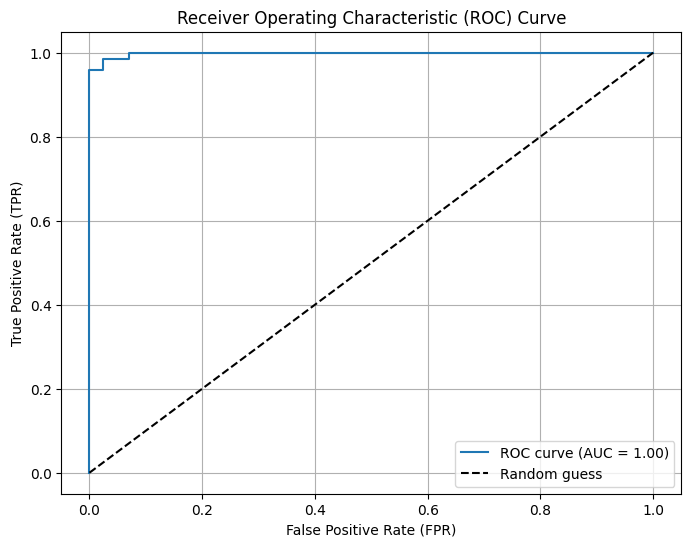

Accuracy: 0.9736842105263158


In [32]:
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

# Load a binary classification dataset (e.g., Breast Cancer)
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target # This is already binary (0 and 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naïve Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier using the training data
nb_classifier.fit(X_train, y_train)

# To compute ROC-AUC, we need the predicted probabilities for the positive class (class 1).
# Naïve Bayes models in scikit-learn have a predict_proba method.
# predict_proba returns probabilities for each class. We need the probability for the positive class (usually the second column).
y_pred_proba = nb_classifier.predict_proba(X_test)[:, 1]

# Compute the ROC-AUC score
# roc_auc_score requires the true binary labels and the predicted probabilities of the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC-AUC Score:", roc_auc)

# Optional: Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess') # Diagonal random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Optional: Also evaluate accuracy for context
y_pred = nb_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

26. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

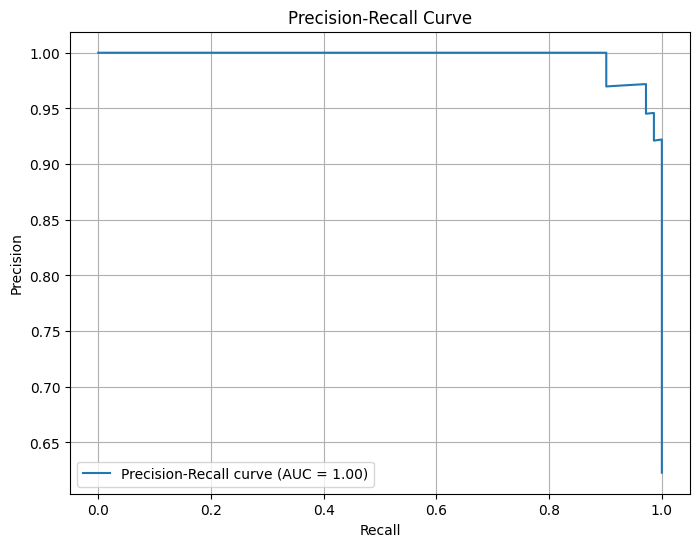

Accuracy: 0.9474

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix:
[[37  6]
 [ 0 71]]


In [33]:
from sklearn.metrics import precision_recall_curve, auc
import seaborn as sns

# Load a dataset suitable for binary classification (e.g., Breast Cancer)
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target # This is already binary (0 for malignant, 1 for benign)

# We want to visualize the PR curve for the positive class (class 1 - benign in this dataset)
# Let's ensure the positive class is handled correctly if needed, although Breast Cancer is binary.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
# We need decision_function or predict_proba for the PR curve.
# SVC with default kernel='rbf' provides decision_function.
# If you use probability=True, you can use predict_proba, which might be more intuitive for probability interpretation,
# but decision_function is often used for SVM PR curves as it represents the distance to the hyperplane.
svm_classifier = svm.SVC(random_state=42, probability=True) # Using probability=True to get predict_proba

# Train the classifier using the training data
svm_classifier.fit(X_train, y_train)

# To plot the Precision-Recall curve, we need the predicted probabilities or decision scores for the positive class.
# For predict_proba, get the probability of the positive class (class 1).
y_pred_proba = svm_classifier.predict_proba(X_test)[:, 1]

# Compute the Precision-Recall curve points
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Compute the Area Under the Precision-Recall Curve (AUPRC or PR AUC)
auprc = auc(recall, precision)

# Visualize the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auprc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Optional: Print other evaluation metrics for context
y_pred = svm_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))